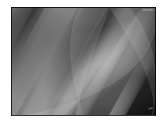

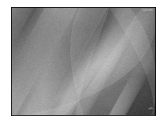

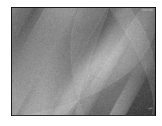

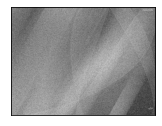

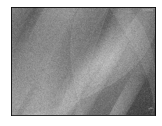

In [14]:
import numpy as np
import random
import cv2
import matplotlib.pyplot as plt

def sp_noise(image,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

image = cv2.imread(r'C:\Users\MACHINE\Documents\5th sem\Untitled Folder\internship\input\c.jpg',0) # Only for grayscale image
randomness=0;
for i in range(5):
    noise_img = sp_noise(image,randomness)
    plt.figure(figsize=(15,15))
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(noise_img, cmap="gray")
    randomness=randomness+0.02
    

In [15]:
from PIL import Image, ImageEnhance
# Opening Image 
im = Image.open(r'C:\Users\MACHINE\Documents\5th sem\Untitled Folder\internship\input\c.jpg') 
  

im3 = ImageEnhance.Brightness(im) 

im3.enhance(1.0).show() 

im3 = ImageEnhance.Sharpness(im)
im3.enhance(5.0).show()

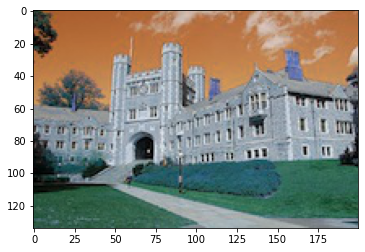

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#contrast stretching
#Contrast stretching is all about increasing the difference between the maximum intensity
#value in an image and the minimum one.
#All the rest of the intensity values are spread out between this range.
img = cv2.imread(r'C:\Users\MACHINE\Documents\5th sem\Untitled Folder\internship\input\princeton_small.jpg')
original = img.copy()
xp = [0, 64, 128, 192, 255]
fp = [0, 16, 128, 240, 255]
x = np.arange(256)
table = np.interp(x, xp, fp).astype('uint8')
img = cv2.LUT(img, table)


plt.imshow(original)
im = cv2.cvtColor(original,cv2.COLOR_BGR2GRAY)
equalized = cv2.equalizeHist(im)



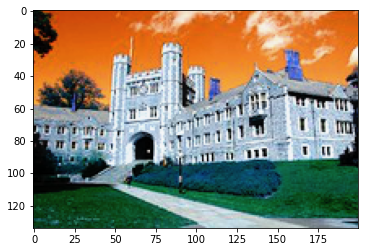

In [17]:
plt.imshow(img)
#contrast stretched image

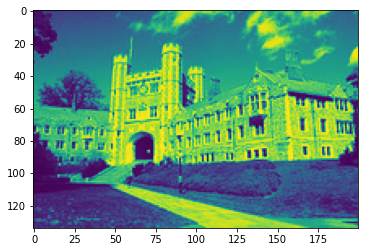

In [18]:
plt.imshow(equalized)
#jupityernotebook applies colormap to greyscale image

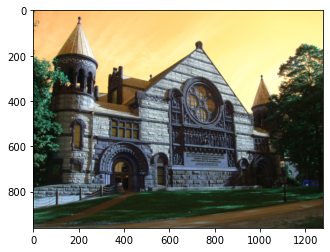

In [23]:
img = cv2.imread(r'C:\Users\MACHINE\Documents\5th sem\Untitled Folder\internship\input\scaleinput.jpg')
#kernel = np.ones((5,5),np.float32)/25
#smoothened = cv2.filter2D(img,-1,kernel)
blur = cv2.GaussianBlur(img,(5,5),0)
plt.imshow(blur)

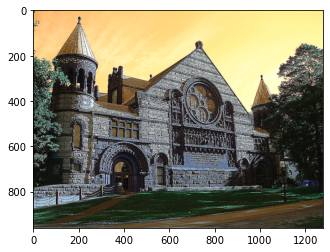

In [24]:
filter = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])

sharpenedimg=cv2.filter2D(img,-1,filter)
plt.imshow(sharpenedimg)

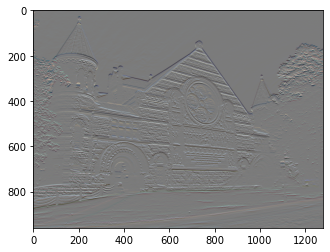

In [25]:
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
sob=(sobely)
sob=(sob-sob.min())/(sob.max()-sob.min())
plt.imshow(sob)

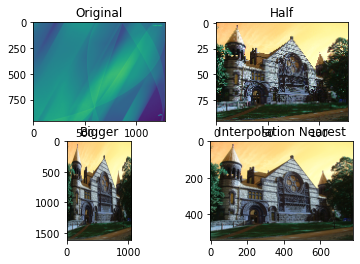

In [26]:
half = cv2.resize(img, (0, 0), fx = 0.1, fy = 0.1) 
bigger = cv2.resize(img, (1050, 1610)) 
  
stretch_near = cv2.resize(img, (780, 540),  
               interpolation = cv2.INTER_NEAREST) 
  
  
Titles =["Original", "Half", "Bigger", "Interpolation Nearest"] 
images =[image, half, bigger, stretch_near] 
count = 4
  
for i in range(count): 
    plt.subplot(2, 2, i + 1) 
    plt.title(Titles[i]) 
    plt.imshow(images[i]) 
  
plt.show() 

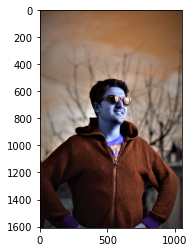

In [47]:
import cv2

foreground = cv2.imread(r'C:\Users\MACHINE\Documents\5th sem\Untitled Folder\internship\input\comp_foreground.jpg')

background = cv2.imread(r'C:\Users\MACHINE\Documents\5th sem\Untitled Folder\internship\input\comp_background.jpg')

alpha = cv2.imread(r'C:\Users\MACHINE\Documents\5th sem\Untitled Folder\internship\input\comp_mask.jpg')
foreground = cv2.resize(foreground, (1050, 1610))
plt.imshow(foreground/255)
#foreground=foreground[400:,:]

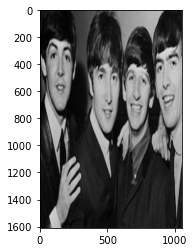

In [48]:
background=cv2.resize(background, (1050, 1610))
plt.imshow(background/255)


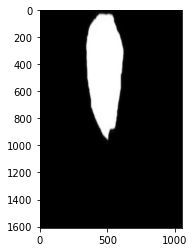

In [49]:
alpha=cv2.resize(alpha, (1050, 1610))
plt.imshow(alpha/255)
# Convert uint8 to float



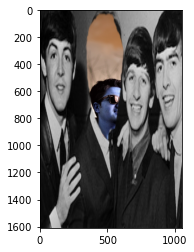

In [50]:
foreground = foreground.astype(float)

background = background.astype(float)

# Normalize the alpha mask to keep intensity between 0 and 1

alpha = alpha.astype(float)/255

# Multiply the foreground with the alpha matte

foreground = cv2.multiply(alpha, foreground)
# Multiply the background with ( 1 - alpha )

background = cv2.multiply(1.0 - alpha, background)
 

# Add the masked foreground and background.

outImage = cv2.add(foreground, background)

# Display image
plt.imshow(outImage/255)

